# MySQL Notes

## Create Database

In [2]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", user="root", passwd="mysql",use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())

    query = "Create database carbon_nanotube;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Database Created!!")
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
Database Created!!


## Creating Table

In [7]:
import mysql.connector as connection

try:
    mydb = connection.connect(host="localhost", database = 'carbon_nanotube',user="root", passwd="mysql",use_pure=True)
    # check if the connection is established
    print(mydb.is_connected())

    query = "CREATE TABLE NanotubeDetails (Chiral_indice_n INT(10),Chiral_indice_m INT(10), Initial_atomic_coordinate_u VARCHAR(20), Initial_atomic_coordinate_v VARCHAR(20),Initial_atomic_coordinate_w VARCHAR(20),Calculated_atomic_coordinates_u VARCHAR(20),Calculated_atomic_coordinates_v VARCHAR(20), Calculated_atomic_coordinates_w VARCHAR(20))"

    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    print("Table Created!!")
    mydb.close()
except Exception as e:
    mydb.close()
    print(str(e))

True
Table Created!!


## Creating Table and insertinga data into the table

In [17]:
import mysql.connector as connection
import pandas as pandas
import csv

In [18]:
class file_to_sql():
    def establish_connection(self):
        passwd = input("Enter your Password: ")
        try:
            mydb = connection.connect(host="localhost", user="root", passwd=passwd, use_pure=True)
            if mydb.is_connected():
                print("Connection Established")
                cur = mydb.cursor()
                return mydb,cur
            else:
                print("Connection Failed")
    
        except Exception as e:
            print("Error While Connecting: {}".format(str(e)))
   
    def create_table(self,mydb,cur,db,tab):
        try:
            cur.execute("create table {}.{}(Chiral_indice_n INT(10),Chiral_indice_m INT(10), Initial_atomic_coordinate_u VARCHAR(20), Initial_atomic_coordinate_v VARCHAR(20),Initial_atomic_coordinate_w VARCHAR(20),Calculated_atomic_coordinates_u VARCHAR(20),Calculated_atomic_coordinates_v VARCHAR(20), Calculated_atomic_coordinates_w VARCHAR(20))".format(db,tab))
            print("Table Created")
        except Exception as e:
            print("Error While creating a Table: {}".format(str(e)))
            mydb.close()
    
    def insert_data(self,mydb,cur,db,tab):
        inserted,not_inserted = 0,0
        file_path = input("Enter Filepath: ")
        delimiter = input("Enter the Delimiter: ")
        try:
            with open(file_path,'r') as data:
                next(data)
                data_csv = csv.reader(data,delimiter=delimiter)
                for i in data_csv:
                    try:
                        query = "INSERT INTO {}.{} values(%s,%s,%s,%s,%s,%s,%s,%s)".format(db,tab)
                        cur.execute(query,list(i))
                        inserted = inserted + 1
                    except Exception as e:
                        print("Not inserted because of error: ".format(str(e)))
                        not_inserted = not_inserted + 1
                mydb.commit()
                print("All the values are inserted")
                mydb.close()
                
        except Exception as e:
            print("Error while Inserting Data: {}".format(str(e)))
            
        return inserted,not_inserted

In [19]:
fi = file_to_sql()

mydb,cur = fi.establish_connection()
table = fi.create_table(mydb,cur,'carbon_nanotube','NanotubeDetails')
inserted,not_inserted = fi.insert_data(mydb,cur,'carbon_nanotube','NanotubeDetails')
print("Inserted {} records and could not Insert {} records".format(inserted,not_inserted))

Enter your Password: mysql
Connection Established
Table Created
Enter Filepath: E:\\Full_Stack_data_science\\Python\\mySQL\\19.2.MySQL\\Imp files\\carbon_nanotubes.csv
Enter the Delimiter: ;
All the values are inserted
Inserted 10721 records and could not Insert 0 records


## Select all columns from the table

In [ ]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'carbon_nanotube',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from carbon_nanotube.NanotubeDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

## Select particular columns from table

In [ ]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'carbon_nanotube',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Chiral_indice_n,Chiral_indice_m from carbon_nanotube.NanotubeDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

## Select Distinct values from selected columns

In [22]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'carbon_nanotube',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select DISTINCT Chiral_indice_n,Chiral_indice_m from carbon_nanotube.NanotubeDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(2, 1)
(3, 1)
(3, 2)
(4, 1)
(4, 2)
(4, 3)
(5, 1)
(5, 2)
(5, 3)
(5, 4)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(7, 1)
(7, 2)
(7, 3)
(7, 4)
(7, 5)
(7, 6)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(9, 1)
(9, 2)
(9, 3)
(9, 4)
(9, 6)
(10, 1)
(10, 2)
(10, 4)
(10, 5)
(10, 6)
(11, 2)
(12, 2)
(12, 3)
(12, 4)
(12, 6)


## Creating Table and insertinga data into the table

In [3]:
import mysql.connector as connection
import pandas as pandas
import csv

In [6]:
class file_to_sql():
    def establish_connection(self):
        passwd = input("Enter your Password: ")
        try:
            mydb = connection.connect(host="localhost", user="root", passwd=passwd, use_pure=True)
            if mydb.is_connected():
                print("Connection Established")
                cur = mydb.cursor()
                return mydb,cur
            else:
                print("Connection Failed")
    
        except Exception as e:
            print("Error While Connecting: {}".format(str(e)))
   
    def create_table(self,mydb,cur,db,tab):
        try:
            cur.execute("create table {}.{}(PassengerId INT(5),Country VARCHAR(20),Firstname VARCHAR(50),Lastname VARCHAR(60),Sex VARCHAR(10),Age INT(10),Category VARCHAR(5),Survived INT(10))".format(db,tab))
            print("Table Created")
        except Exception as e:
            print("Error While creating a Table: {}".format(str(e)))
            mydb.close()
    
    def insert_data(self,mydb,cur,db,tab,delimiter):
        inserted,not_inserted = 0,0
        file_path = input("Enter Filepath: ")
        #delimiter = input("Enter the Delimiter: ")
        try:
            with open(file_path,'r') as data:
                next(data)
                data_csv = csv.reader(data,delimiter=delimiter)
                for i in data_csv:
                    try:
                        query = "INSERT INTO {}.{} values(%s,%s,%s,%s,%s,%s,%s,%s)".format(db,tab)
                        cur.execute(query,list(i))
                        inserted = inserted + 1
                    except Exception as e:
                        print("Not inserted because of error: ".format(str(e)))
                        not_inserted = not_inserted + 1
                mydb.commit()
                print("All the values are inserted")
                mydb.close()
                
        except Exception as e:
            print("Error while Inserting Data: {}".format(str(e)))
            
        return inserted,not_inserted

In [7]:
fi = file_to_sql()

mydb,cur = fi.establish_connection()
table = fi.create_table(mydb,cur,'estonia','PassengerDetails')
inserted,not_inserted = fi.insert_data(mydb,cur,'estonia','PassengerDetails',',')
print("Inserted {} records and could not Insert {} records".format(inserted,not_inserted))

Enter your Password: mysql
Connection Established
Table Created
Enter Filepath: E:\\Full_Stack_data_science\\Python\\mySQL\\19.2.MySQL\\Imp files\\estonia-passenger-list.csv
All the values are inserted
Inserted 989 records and could not Insert 0 records


## Select all columns from the table

In [8]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from estonia.PassengerDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(1, 'Sweden', 'ARVID KALLE', 'AADLI', 'M', 62, 'P', 0)
(2, 'Estonia', 'LEA', 'AALISTE', 'F', 22, 'C', 0)
(3, 'Estonia', 'AIRI', 'AAVASTE', 'F', 21, 'C', 0)
(4, 'Sweden', 'JURI', 'AAVIK', 'M', 53, 'C', 0)
(5, 'Sweden', 'BRITTA ELISABET', 'AHLSTROM', 'F', 55, 'P', 0)
(6, 'Sweden', 'GERD INGA MAGNHILD', 'AHLSTROM', 'F', 71, 'P', 0)
(7, 'Sweden', 'HJALMAR', 'AHLSTROM', 'M', 60, 'P', 0)
(8, 'Estonia', 'PILLE', 'AHMAN', 'F', 18, 'P', 0)
(9, 'Estonia', 'TORMI', 'AINSALU', 'M', 30, 'C', 0)
(10, 'Sweden', 'ANNA MARIA', 'ALDRIN', 'F', 63, 'P', 0)
(11, 'Sweden', 'LARS BERTIL', 'ALDRIN', 'M', 67, 'P', 0)
(12, 'Estonia', 'NELLI', 'ALEKSEEVA', 'F', 61, 'P', 0)
(13, 'Estonia', 'URMAS', 'ALENDER', 'M', 40, 'C', 0)
(14, 'Sweden', 'TAMARA', 'ALEP', 'F', 68, 'P', 0)
(15, 'Estonia', 'KATRIN', 'ALLA', 'F', 36, 'C', 0)
(16, 'Estonia', 'LINE', 'ALLA', 'F', 23, 'C', 0)
(17, 'Estonia', 'ARMIDO', 'ALLAS', 'M', 31, 'P', 0)
(18, 'Sweden', 'BENGT SOLVE INGEMAR', 'ALM', 'M', 74, 'P', 0)
(19, 'Sweden', 'GUN DAG

(900, 'Estonia', 'TONU', 'TONISTE', 'M', 38, 'P', 1)
(901, 'Estonia', 'URMAS', 'UDUSTE', 'M', 24, 'C', 1)
(902, 'Sweden', 'MARIA ELISABET', 'ULLSTRAND', 'F', 71, 'P', 0)
(903, 'Estonia', 'ANDRES', 'ULP', 'M', 39, 'P', 0)
(904, 'Estonia', 'ARVO', 'URBALU', 'M', 39, 'P', 0)
(905, 'Sweden', 'CARL GUNNAR VERNER', 'JUTSTEN', 'M', 71, 'P', 0)
(906, 'Sweden', 'MAJA INGEGARD', 'JUTSTEN', 'F', 69, 'P', 0)
(907, 'Estonia', 'TIINA', 'VABRITT TIBBING', 'F', 50, 'P', 0)
(908, 'Estonia', 'IVO', 'VAHER', 'M', 42, 'P', 0)
(909, 'Estonia', 'KALEV', 'VAHTRAS', 'M', 43, 'C', 0)
(910, 'Estonia', 'PRIIT', 'VAIGLA', 'M', 38, 'P', 0)
(911, 'Estonia', 'EIVO', 'VALD', 'M', 21, 'C', 0)
(912, 'Estonia', 'MEIDA', 'VALDMETS', 'F', 49, 'C', 0)
(913, 'Estonia', 'SIGNE', 'VALDMETS', 'F', 21, 'C', 0)
(914, 'Latvia', 'ALBERT', 'VALEJEVS', 'M', 9, 'P', 0)
(915, 'Latvia', 'FARID', 'VALEJEVS', 'F', 46, 'P', 0)
(916, 'Sweden', 'BRITT-MARI', 'VANHANEN', 'F', 64, 'P', 0)
(917, 'Sweden', 'EINO', 'VANHANEN', 'M', 66, 'P', 0)
(

## Select particular columns from table

In [10]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARVID KALLE', 'AADLI')
('LEA', 'AALISTE')
('AIRI', 'AAVASTE')
('JURI', 'AAVIK')
('BRITTA ELISABET', 'AHLSTROM')
('GERD INGA MAGNHILD', 'AHLSTROM')
('HJALMAR', 'AHLSTROM')
('PILLE', 'AHMAN')
('TORMI', 'AINSALU')
('ANNA MARIA', 'ALDRIN')
('LARS BERTIL', 'ALDRIN')
('NELLI', 'ALEKSEEVA')
('URMAS', 'ALENDER')
('TAMARA', 'ALEP')
('KATRIN', 'ALLA')
('LINE', 'ALLA')
('ARMIDO', 'ALLAS')
('BENGT SOLVE INGEMAR', 'ALM')
('GUN DAGMAR INGEGERD', 'ALM')
('CARL OLOF INGVAR', 'ALMQUIST')
('HJORDIS IRENE', 'ANDERLJUNG')
('PAUL', 'ANDERSON')
('AGNE KARL ARVID', 'ANDERSSON')
('ANNA LENA', 'ANDERSSON')
('INGRID VIOLA AMALIA', 'ANDERSSON')
('IRIS VIKTORIA', 'ANDERSSON')
('JILL MARIA', 'ANDERSSON')
('KAJ OLAV ARTHUR', 'ANDERSSON')
('KARL ERIK', 'ANDERSSON')
('LARS MAGNUS', 'ANDERSSON')
('MONICA INGEGERD', 'ANDERSSON')
('PER ALBERT', 'ANDERSSON')
('RUT INGEGERD', 'ANDERSSON')
('RUTH INGER', 'ANDERSSON')
('ULLA GUNVOR LINNEA', 'ANDERSSON')
('VIVI INGEBORG MARIANN', 'ANDERSSON')
('AKE HILMER', 'ANDERSSON

('MIRJAM', 'MARIPUU')
('JURI', 'MARKUS')
('JAAKKO ANTERO', 'MARTTINEN')
('IVI', 'MATSALU')
('VALDUR', 'MATT')
('ANNIKA ELISABETH MARGA', 'MATTSSON')
('ELSIE VIOLA ELISABET', 'MATTSSON')
('KARL AKE', 'MATTSSON')
('AINO ANITA GUNILLA', 'MAXE')
('MAUD ROS-MARIE', 'MELEHOFF')
('ULLA BIRGITTA', 'MELLSTROM')
('THT', 'MEOS')
('ANNELI', 'METSALLIK')
('MAARIKA', 'METSALLIK')
('ALDO', 'METSPALO')
('BRITT INGER', 'MILD')
('VYTATAS', 'MILIAUSKAS')
('OLGA VLAD', 'MINTCHOUKOVA-HOLMSTEIN')
('ILLE', 'MOLLOKA')
('TANEL', 'MOOSAAR')
('LUCIA LJUTSIA', 'MOREL')
('JAAK', 'MULLO')
('HEDI', 'MURUMAGI')
('RIHO', 'MUUR')
('TINA', 'MUUR')
('DAN-ANDERS ADRIAN', 'MYRBERG')
('MONICA ANITA', 'MYRBERG')
('SUSANNE MARLE', 'MYRSTROM KARLSSON')
('ELVIR MARTIN', 'MANSSON')
('SVEN ERIK', 'MANSSON')
('GULL-BRITT AGNETA MARIA', 'MARDH')
('CURT SIXTEN', 'MAHL')
('ERKKI JUHANI', 'MAKI-KALA')
('JARMO KALERVO', 'MAKINEN')
('ELMAR', 'MANDLA')
('HEDDI', 'MANNISTE')
('VASILI', 'MARTSON')
('TIINA', 'MOLDER')
('DANI', 'MOLLER')
('L

## Select Distinct values from selected columns

In [11]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select DISTINCT Country from estonia.PassengerDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('Sweden',)
('Estonia',)
('Latvia',)
('Russia',)
('Germany',)
('Finland',)
('Great Britain',)
('Morocco',)
('Denmark',)
('France',)
('Netherlands',)
('Norway',)
('Lithuania',)
('Nigeria',)
('Canada',)
('Belarus',)


## SQL WHERE CLAUSE

In [13]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Survived = 1;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('PAUL', 'ANDERSON')
('PER ALBERT', 'ANDERSSON')
('NIKOLAJS', 'ANDREJEVS')
('ANTI', 'ARAK')
('JANNO', 'ASER')
('EWA MARGARETHA', 'ASKERUP')
('PAUL', 'BARNEY')
('KARIN LINNEA', 'ERGQVIST')
('RONNIE INGVAR', 'ERGOVIST')
('HELVE', 'BLUMFELTH')
('LEIF VILHELM', 'BOGREN')
('MORTEN', 'BOJE')
('STEPHAN', 'DUIJNDAN')
('MARIANNE ELLEN ELISABET', 'EHN')
('PER-ERIK', 'EHRNSTEN')
('CHRISTER OSSIAN', 'EKLOF')
('NILS HAKAN VILHELM', 'EKSTEDT')
('ANDERS HARALD', 'ERIKSSON')
('KARIN BIRGIT ELISABET', 'ERIKSSON')
('MATS', 'FINNANGER')
('JERZY', 'FLORYSIAK')
('MARIA ELISABETH', 'FAGERSTEN')
('ERIK GUSTAV EVERT', 'GEMHEDEN')
('JAN OLOF', 'GRAFSTROM')
('IGOR', 'GRITSIOUS')
('NEBOJSA JOHN', 'GRKOVIC')
('THOMAS ERIK ANDREAS', 'GRUNDE')
('ALTTI JUHANI', 'HAKANPAA')
('SARA MARIA', 'HEDRENIUS')
('KJELL TAGE OSKAR', 'HELLGREN')
('KERIM', 'HESTNES-NISANCIOGLO')
('MATS EDVARD', 'HILLERSTROM')
('KENT ROLF MAGNUS', 'HARSTEDT')
('JUKKA PEKKA', 'IHALAINEN')
('VILHO VALTTERI', 'ITARANTA')
('SIRJE', 'JOHANSSON')
(

## Operators in where clause

### =	Equal 
### >	Greater than
### <	Less than
### >=	Greater than equal 
### <=	Less than equal 
### < >	Not equal (also written as !=)
### BETWEEN	Between a range 
### LIKE	Search for  pattern 
### IN	Specify multiple possible values for a column


## WHERE clause with AND

In [14]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname,Country from estonia.PassengerDetails WHERE Firstname = 'HJALMAR' AND Lastname = 'AHLSTROM';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('HJALMAR', 'AHLSTROM', 'Sweden')


## WHERE clause with OR

In [15]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname,Country,Sex from estonia.PassengerDetails WHERE Country = 'Denmark' OR Sex = 'F';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('LEA', 'AALISTE', 'Estonia', 'F')
('AIRI', 'AAVASTE', 'Estonia', 'F')
('BRITTA ELISABET', 'AHLSTROM', 'Sweden', 'F')
('GERD INGA MAGNHILD', 'AHLSTROM', 'Sweden', 'F')
('PILLE', 'AHMAN', 'Estonia', 'F')
('ANNA MARIA', 'ALDRIN', 'Sweden', 'F')
('NELLI', 'ALEKSEEVA', 'Estonia', 'F')
('TAMARA', 'ALEP', 'Sweden', 'F')
('KATRIN', 'ALLA', 'Estonia', 'F')
('LINE', 'ALLA', 'Estonia', 'F')
('GUN DAGMAR INGEGERD', 'ALM', 'Sweden', 'F')
('HJORDIS IRENE', 'ANDERLJUNG', 'Sweden', 'F')
('ANNA LENA', 'ANDERSSON', 'Sweden', 'F')
('INGRID VIOLA AMALIA', 'ANDERSSON', 'Sweden', 'F')
('IRIS VIKTORIA', 'ANDERSSON', 'Sweden', 'F')
('JILL MARIA', 'ANDERSSON', 'Sweden', 'F')
('MONICA INGEGERD', 'ANDERSSON', 'Sweden', 'F')
('RUT INGEGERD', 'ANDERSSON', 'Sweden', 'F')
('RUTH INGER', 'ANDERSSON', 'Sweden', 'F')
('ULLA GUNVOR LINNEA', 'ANDERSSON', 'Sweden', 'F')
('VIVI INGEBORG MARIANN', 'ANDERSSON', 'Sweden', 'F')
('ALLA', 'ANNUS', 'Estonia', 'F')
('EVI', 'ANTUK', 'Estonia', 'F')
('KARIN CECILIA', 'APELMAN'

## WHERE clause with NOT

In [16]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname,Country,Sex from estonia.PassengerDetails WHERE NOT Sex='M';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('LEA', 'AALISTE', 'Estonia', 'F')
('AIRI', 'AAVASTE', 'Estonia', 'F')
('BRITTA ELISABET', 'AHLSTROM', 'Sweden', 'F')
('GERD INGA MAGNHILD', 'AHLSTROM', 'Sweden', 'F')
('PILLE', 'AHMAN', 'Estonia', 'F')
('ANNA MARIA', 'ALDRIN', 'Sweden', 'F')
('NELLI', 'ALEKSEEVA', 'Estonia', 'F')
('TAMARA', 'ALEP', 'Sweden', 'F')
('KATRIN', 'ALLA', 'Estonia', 'F')
('LINE', 'ALLA', 'Estonia', 'F')
('GUN DAGMAR INGEGERD', 'ALM', 'Sweden', 'F')
('HJORDIS IRENE', 'ANDERLJUNG', 'Sweden', 'F')
('ANNA LENA', 'ANDERSSON', 'Sweden', 'F')
('INGRID VIOLA AMALIA', 'ANDERSSON', 'Sweden', 'F')
('IRIS VIKTORIA', 'ANDERSSON', 'Sweden', 'F')
('JILL MARIA', 'ANDERSSON', 'Sweden', 'F')
('MONICA INGEGERD', 'ANDERSSON', 'Sweden', 'F')
('RUT INGEGERD', 'ANDERSSON', 'Sweden', 'F')
('RUTH INGER', 'ANDERSSON', 'Sweden', 'F')
('ULLA GUNVOR LINNEA', 'ANDERSSON', 'Sweden', 'F')
('VIVI INGEBORG MARIANN', 'ANDERSSON', 'Sweden', 'F')
('ALLA', 'ANNUS', 'Estonia', 'F')
('EVI', 'ANTUK', 'Estonia', 'F')
('KARIN CECILIA', 'APELMAN'

## Update

In [20]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Update estonia.PassengerDetails SET Firstname = 'Jingle' WHERE Lastname = 'AHMAN';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    mydb.commit()

except Exception as e:
    #mydb.close()
    print(str(e))

True


In [21]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Firstname ='Jingle';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('Jingle', 'AHMAN')


## SQL ORDER BY

### Descending Order

In [22]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails ORDER BY Firstname DESC;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('YVONNE BRITT MARIE', 'NORLIN')
('YNGVE', 'LIEN')
('YLOQ', 'KIKAS')
('YASMINA SOFIA', 'WEIDINGER')
('WOLTER JOHAN', 'EHN')
('WANDA KARIN ELISAB', 'WACHTMEISTER')
('VYTATAS', 'MILIAUSKAS')
('VIVI INGEBORG MARIANN', 'ANDERSSON')
('VITALIJA', 'GUDAITIENE')
('VILLU', 'OSSIP')
('VILHO VALTTERI', 'ITARANTA')
('VIKTOR', 'BOGDANOV')
('VIKTOR', 'PSENITSNOI')
('VIKTOR', 'REIAL')
('VERA MARGARETA', 'ODEN')
('VELLO', 'RUBEN')
('VELLO', 'KORNEL')
('VELJO', 'JUUSE')
('VEIKO', 'PETTERSON')
('VASSILY PHILIP', 'KOVALEV')
('VASSILI', 'VORONIN')
('VASSILI', 'SIMONOVITS')
('VASILI', 'MARTSON')
('VASILI', 'KRJUTSKOV')
('VALTERS', 'KIKUTS')
('VALEV', 'PREI')
('VALERI', 'KRIOUTCHKOV')
('VALENTINA', 'TOOM')
('VALENTINA', 'PLEHHANOVA')
('VALDUR', 'MATT')
('VALBORG', 'FLODERUS')
('VAIKE', 'KASK')
('VAHUR', 'VUKS')
('URVE', 'AUN')
('URMAS', 'UDUSTE')
('URMAS', 'LAANE')
('URMAS', 'ALENDER')
('UNO', 'TONISSOO')
('UNO', 'MALM')
('ULLE', 'POLDSAAR')
('ULLE', 'TOMBAK')
('ULLE', 'LILLEPALU')
('ULLE', 'KARU')
('U

### Ascending Order

In [23]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails ORDER BY Firstname ASC;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('AARE', 'KIMMEL')
('AARNE', 'KOPPEL')
('AASA MARGARETA', 'PETERSSON')
('AAVO', 'KOOGAS')
('ADAM', 'MAKARENKO')
('ADAM', 'HALTER')
('ADELJA', 'KOLESNIKOVA')
('AGNE KARL ARVID', 'ANDERSSON')
('AGNETA', 'JONSSON')
('AGNETA RUTH INGEGERD', 'KOPSEN')
('AGO', 'TOMINGAS')
('AGO', 'KUKK')
('AGRITA', 'BERNOVICS')
('AGUR', 'TARGAMA')
('AILI', 'HEINSOO')
('AIME', 'PIHUS')
('AIMUR', 'TOOBAL')
('AIN-ALAR', 'JUHANSON')
('AINA', 'LEE')
('AINO', 'TALME')
('AINO ANITA GUNILLA', 'MAXE')
('AIRI', 'AAVASTE')
('AITA', 'QJA')
('AIVAR', 'ZELMIN')
('AIVARS', 'STAUZS')
('AIVE', 'PITK')
('AKE HILMER', 'ANDERSSON')
('AKE HOLGER', 'CARLSSON')
('ALBERT', 'VALEJEVS')
('ALBERTS-JULIJS', 'BIELIS')
('ALDO', 'METSPALO')
('ALEKSANDER', 'VORONIN')
('ALEKSEI GRIGORY', 'ARTJUHHOV')
('ALEXANDER', 'SALU')
('ALEXSANDRE OLIIRIEVICH', 'MAMAEV')
('ALEXSANDRS', 'JAKUBOVSKIS')
('ALF BERNT MAURITZ', 'CARLSSON')
('ALLA', 'ANNUS')
('ALLAN-JUAI', 'SOOMAN')
('ALTTI JUHANI', 'HAKANPAA')
('ALVAR', 'RAUDSEPP')
('AlVO', 'GROSSFELDT')

('ULLA-BRITT LILIAN', 'NORD')
('ULLA-BRITT ROSE-MARIE', 'GUTELIND')
('ULLAR', 'SARI')
('ULLE', 'POLDSAAR')
('ULLE', 'TOMBAK')
('ULLE', 'ARULA')
('ULLE', 'LILLEPALU')
('ULLE', 'KARU')
('UNO', 'MALM')
('UNO', 'TONISSOO')
('URMAS', 'UDUSTE')
('URMAS', 'LAANE')
('URMAS', 'ALENDER')
('URVE', 'AUN')
('VAHUR', 'VUKS')
('VAIKE', 'KASK')
('VALBORG', 'FLODERUS')
('VALDUR', 'MATT')
('VALENTINA', 'PLEHHANOVA')
('VALENTINA', 'TOOM')
('VALERI', 'KRIOUTCHKOV')
('VALEV', 'PREI')
('VALTERS', 'KIKUTS')
('VASILI', 'KRJUTSKOV')
('VASILI', 'MARTSON')
('VASSILI', 'VORONIN')
('VASSILI', 'SIMONOVITS')
('VASSILY PHILIP', 'KOVALEV')
('VEIKO', 'PETTERSON')
('VELJO', 'JUUSE')
('VELLO', 'KORNEL')
('VELLO', 'RUBEN')
('VERA MARGARETA', 'ODEN')
('VIKTOR', 'REIAL')
('VIKTOR', 'BOGDANOV')
('VIKTOR', 'PSENITSNOI')
('VILHO VALTTERI', 'ITARANTA')
('VILLU', 'OSSIP')
('VITALIJA', 'GUDAITIENE')
('VIVI INGEBORG MARIANN', 'ANDERSSON')
('VYTATAS', 'MILIAUSKAS')
('WANDA KARIN ELISAB', 'WACHTMEISTER')
('WOLTER JOHAN', 'EHN')
('YA

## Limit

In [24]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from estonia.PassengerDetails LIMIT 10;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(1, 'Sweden', 'ARVID KALLE', 'AADLI', 'M', 62, 'P', 0)
(2, 'Estonia', 'LEA', 'AALISTE', 'F', 22, 'C', 0)
(3, 'Estonia', 'AIRI', 'AAVASTE', 'F', 21, 'C', 0)
(4, 'Sweden', 'JURI', 'AAVIK', 'M', 53, 'C', 0)
(5, 'Sweden', 'BRITTA ELISABET', 'AHLSTROM', 'F', 55, 'P', 0)
(6, 'Sweden', 'GERD INGA MAGNHILD', 'AHLSTROM', 'F', 71, 'P', 0)
(7, 'Sweden', 'HJALMAR', 'AHLSTROM', 'M', 60, 'P', 0)
(8, 'Estonia', 'Jingle', 'AHMAN', 'F', 18, 'P', 0)
(9, 'Estonia', 'TORMI', 'AINSALU', 'M', 30, 'C', 0)
(10, 'Sweden', 'ANNA MARIA', 'ALDRIN', 'F', 63, 'P', 0)


### The SQL MIN() AND MAX() FUNCTION

The MIN() function in SQL returns the smallest value of the selected column from the table. The MAX() function in SQL returns the largest value of the selected column from the table


In [27]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select MAX(AGE) from estonia.PassengerDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(87,)


In [28]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select MIN(AGE) from estonia.PassengerDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(0,)


### SQL COUNT(), AVG() AND SUM() FUNCTION

The COUNT()  function gives the number of rows that matches specified conditions. And the  AVG() function in SQL returns the average value of a numeric column. The SUM() function in SQL returns the total sum of a numeric column.


### Count

In [38]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Count(Survived) from estonia.PassengerDetails WHERE Sex = 'M';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(503,)


### Average

In [33]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Avg(Age) from estonia.PassengerDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(Decimal('44.5753'),)


### Sum

In [36]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Sum(Survived) from estonia.PassengerDetails WHERE Survived = 1;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(Decimal('137'),)


## SQL LIKE-OPERATOR
The LIKE operator is used with the WHERE clause to find for a specified pattern in an attribute. The two wildcards are used in conjunction with the LIKE operator: 


o	%  - it represents zero, one, or multiple characters

o	_   -  it represents a single character

Note: MS Access uses an asterisk (*) in place of the percent sign (%)and a question mark (?) in place of the underscore (_).
The ‘%’ and the ‘_’ can also be used in combinations.


### Selects all columns of the customer with a Firstname starting with "D"

In [39]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Firstname LIKE 'D%';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('DAGNY MARGARETA', 'ATTERFORS')
('DORIS ELISABET', 'HOLMKVIST')
('DINA', 'JAKUBOVSKA')
('DAN PETHER STEFAN', 'JOHANSSON')
('DICK ROGER', 'JORGENSEN')
('DAGNY MARGARETTA', 'LIDNER')
('DAN-ANDERS ADRIAN', 'MYRBERG')
('DANI', 'MOLLER')
('DAVID RICKARD', 'NILSSON')
('DAN EVERT', 'OLSSON')
('DICK RONALD', 'PALM')
('DAN JONAS', 'PERSSON')
('DAINIS', 'SLEINERS')
('DAGNY JOHNY GUSTAVA', 'STENGARD')
('DANIEL NILS BERTIL', 'SVENSSON')


### Selects all columns of the customer with a Firstname Ending with "E"

In [40]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Firstname LIKE '%E';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARVID KALLE', 'AADLI')
('Jingle', 'AHMAN')
('LINE', 'ALLA')
('HJORDIS IRENE', 'ANDERLJUNG')
('ULLE', 'ARULA')
('URVE', 'AUN')
('EVA LOUISE', 'BEKKEWOLD')
('ANN-MARIE YVONNE', 'BERNERVALL')
('HELVE', 'BLUMFELTH')
('KARL OVE', 'BODIN')
('SYLVIE', 'BRIDET')
('MARIE LOUISE', 'CARSEUS')
('ANNE-MARIE', 'CRONSTROM')
('SKAIDRITE', 'CULKSTENE')
('BARBRO GUNNEL MARIANNE', 'EKSVARD')
('ANNGARD IRENE', 'ENGBERG')
('KARL ARNE', 'ENGBERG')
('ANN-CHARLOTTE', 'ERIKSSON')
('IRIS LINNEA MARIANNE', 'ERIKSSON')
('MAJ-BRITT IRENE', 'ERIKSSON')
('MARIE', 'FINNANGER')
('ELVY MARIANNE', 'FORSEN')
('ELLEN MARIE', 'FROSETH')
('ANNIKA KRISTINE', 'GRUNDSTROM')
('GINTARE', 'GUDAITYTE')
('FRODE', 'GUDBRANDSEN')
('BERTIL VILLEHARD ALE', 'GUSTAFSSON')
('ANN CHRISTINE', 'GUSTAVSSON')
('ULLA-BRITT ROSE-MARIE', 'GUTELIND')
('KARIN MARIANNE', 'HAGLUND')
('ARMILDA ALICE', 'HAIN')
('BOB STURE', 'HALLIN')
('REBECKA IRENE', 'HENRYSSON')
('SVEN OVE', 'HOLSTROM')
('KARL GOSTA BERTIE', 'HOGMAN')
('SIRJE', 'JOHANSSON')
('

### Selects all columns of the customer with a Firstname that have "or" in any position.

In [41]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Firstname LIKE '%OR%';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('TORMI', 'AINSALU')
('HJORDIS IRENE', 'ANDERLJUNG')
('IRIS VIKTORIA', 'ANDERSSON')
('ULLA GUNVOR LINNEA', 'ANDERSSON')
('VIVI INGEBORG MARIANN', 'ANDERSSON')
('ALEKSEI GRIGORY', 'ARTJUHHOV')
('BJORN OLA ENGELBERT', 'BERGENHEIM')
('ELLINOR MARGARETA', 'BERGKVIST')
('HELGE VIKTOR', 'BERGKVIST')
('GUNBORG LINNEA', 'BERLIN')
('VIKTOR', 'BOGDANOV')
('MORTEN', 'BOJE')
('BJORN MIKAEL', 'DAHLIN')
('ERIK AXEL GORAN', 'DUKE')
('MAJ RIGMOR', 'EBERSTEIN')
('BJORN MAGNUS', 'ELOFSON')
('BRITTA MARIA TEQDORA', 'ERIKSSON')
('MARGIT INGEBORG', 'ERIKSSON')
('VALBORG', 'FLODERUS')
('GRETA INGEBORG', 'GAHNOLD')
('IGOR', 'GRITSIOUS')
('ARNE VIKTOR', 'GRONHAGE')
('KERSTIN INGEBORG LINNEA', 'GUNNAR')
('SVEA INGEBORG MARIA', 'GUSTAVSSON')
('HANSES MARTA GUNBORG', 'HAGMAN')
('DORIS ELISABET', 'HOLMKVIST')
('NILS-GORAN AXEL', 'HOLTBLAD')
('HELDOR', 'JOA')
('KARIN MAJVOR', 'KARLSSON')
('HJORDIS TERESIA', 'KUMLIN')
('ELIS CLAS GORAN', 'LARSSON')
('CARL GREGOR', 'LENNMOR')
('GOSTA GEORG', 'LINDER')
('BENGT G

### Selects all columns of the customer with a Firstname that have "or" after one character and any number of character after that.

In [42]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Firstname LIKE '_OR%';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('TORMI', 'AINSALU')
('MORTEN', 'BOJE')
('DORIS ELISABET', 'HOLMKVIST')
('TOR BEATEL', 'NORDMYR')
('TOR GORAN HAKAN', 'RISINGER')
('SOREN EVALD', 'SANDMAN')
('JORMA OLAVI', 'VAISANEN')


### Selects all columns of the customer with a Firstname that have "or" after 4 character and no character after that.

In [47]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Firstname LIKE '____OR';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('VIKTOR', 'BOGDANOV')
('HELDOR', 'JOA')
('VIKTOR', 'PSENITSNOI')
('VIKTOR', 'REIAL')


### Selects all columns of the customer with a Firstname that have "or" after 4 character and one character after that.

In [48]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Firstname LIKE '____OR_';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('VALBORG', 'FLODERUS')


### Selects all columns of the customer with a first_name that starts with "a" and ends with "o"

In [49]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Firstname LIKE 'a%o';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARMIDO', 'ALLAS')
('ARVO', 'ANDRESSON')
('AlVO', 'GROSSFELDT')
('AVO', 'KILGAST')
('AAVO', 'KOOGAS')
('AGO', 'KUKK')
('ALDO', 'METSPALO')
('AVO', 'PIHT')
('ARVO', 'POOPUU')
('AINO', 'TALME')
('AGO', 'TOMINGAS')
('ARVO', 'TULVIK')
('ARVO', 'URBALU')


### Selects all columns of the customer with a first_name that starts with "a" and are at least six characters in length

In [50]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname,Lastname from estonia.PassengerDetails WHERE Firstname LIKE 'a____%';"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARVID KALLE', 'AADLI')
('ANNA MARIA', 'ALDRIN')
('ARMIDO', 'ALLAS')
('AGNE KARL ARVID', 'ANDERSSON')
('ANNA LENA', 'ANDERSSON')
('AKE HILMER', 'ANDERSSON')
('ALEKSEI GRIGORY', 'ARTJUHHOV')
('ANN-CHARLOTTE CARLSDOTT', 'ASPLUND')
('ANDRES', 'AVEKUKK')
('ANN-MARIE YVONNE', 'BERNERVALL')
('AGRITA', 'BERNOVICS')
('ALBERTS-JULIJS', 'BIELIS')
('ALF BERNT MAURITZ', 'CARLSSON')
('AKE HOLGER', 'CARLSSON')
('ANNE-MARIE', 'CRONSTROM')
('ANN CATRIN', 'DAHLSTROM')
('ASTRID ELISABET', 'EDSTAM')
('ANNGARD IRENE', 'ENGBERG')
('ARTHUR SIGVARD', 'JENGGRON')
('ANNBRITT MON', 'ERICSSON BEGODZKI')
('ANDERS HARALD', 'ERIKSSON')
('ANN-CHARLOTTE', 'ERIKSSON')
('ANNA INGER', 'FAHLANDER')
('ANITA MARGARETA', 'FORSLUND')
('ANNELI INGER', 'FREDRIKSSON')
('ANNIKA KRISTINE', 'GRUNDSTROM')
('ARNE VIKTOR', 'GRONHAGE')
('ANNA ELISABETH', 'GUSTAFSSON')
('ANN CHRISTINE', 'GUSTAVSSON')
('ANNELI', 'HAAS')
('ASA ALFHILD', 'HAGELBERG')
('ARMILDA ALICE', 'HAIN')
('ALTTI JUHANI', 'HAKANPAA')
('ASA KAROLINA', 'HEDMAN')
(

## SQL IN AND NOT IN OPERATORS

### The IN operator allows users to specify multiple values in a WHERE clause.  The IN operator is a shorthand for various OR conditions.

### IN Syntax

In [51]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from estonia.PassengerDetails WHERE PassengerId IN(1,2,3,22,43,67,89,721,831);"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(1, 'Sweden', 'ARVID KALLE', 'AADLI', 'M', 62, 'P', 0)
(2, 'Estonia', 'LEA', 'AALISTE', 'F', 22, 'C', 0)
(3, 'Estonia', 'AIRI', 'AAVASTE', 'F', 21, 'C', 0)
(22, 'Estonia', 'PAUL', 'ANDERSON', 'M', 32, 'C', 1)
(43, 'Sweden', 'EVALD VALTER', 'APELMAN', 'M', 69, 'P', 0)
(67, 'Morocco', 'HICHAM', 'BEN HAMOU', 'M', 29, 'P', 0)
(89, 'Sweden', 'KARL OVE', 'BODIN', 'M', 50, 'P', 0)
(721, 'Sweden', 'MAJ-BRITT', 'RASMUSSEN', 'F', 62, 'P', 0)
(831, 'Sweden', 'LISE-LOTTE', 'SUNDBERG', 'F', 34, 'P', 0)


### NOT IN Syntax

In [54]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from estonia.PassengerDetails WHERE PassengerId NOT IN(1,2,3,10,15,17,20);"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(4, 'Sweden', 'JURI', 'AAVIK', 'M', 53, 'C', 0)
(5, 'Sweden', 'BRITTA ELISABET', 'AHLSTROM', 'F', 55, 'P', 0)
(6, 'Sweden', 'GERD INGA MAGNHILD', 'AHLSTROM', 'F', 71, 'P', 0)
(7, 'Sweden', 'HJALMAR', 'AHLSTROM', 'M', 60, 'P', 0)
(8, 'Estonia', 'Jingle', 'AHMAN', 'F', 18, 'P', 0)
(9, 'Estonia', 'TORMI', 'AINSALU', 'M', 30, 'C', 0)
(11, 'Sweden', 'LARS BERTIL', 'ALDRIN', 'M', 67, 'P', 0)
(12, 'Estonia', 'NELLI', 'ALEKSEEVA', 'F', 61, 'P', 0)
(13, 'Estonia', 'URMAS', 'ALENDER', 'M', 40, 'C', 0)
(14, 'Sweden', 'TAMARA', 'ALEP', 'F', 68, 'P', 0)
(16, 'Estonia', 'LINE', 'ALLA', 'F', 23, 'C', 0)
(18, 'Sweden', 'BENGT SOLVE INGEMAR', 'ALM', 'M', 74, 'P', 0)
(19, 'Sweden', 'GUN DAGMAR INGEGERD', 'ALM', 'F', 68, 'P', 0)
(21, 'Sweden', 'HJORDIS IRENE', 'ANDERLJUNG', 'F', 63, 'P', 0)
(22, 'Estonia', 'PAUL', 'ANDERSON', 'M', 32, 'C', 1)
(23, 'Sweden', 'AGNE KARL ARVID', 'ANDERSSON', 'M', 62, 'P', 0)
(24, 'Sweden', 'ANNA LENA', 'ANDERSSON', 'F', 28, 'P', 0)
(25, 'Sweden', 'INGRID VIOLA AMALIA',

(161, 'Sweden', 'INGEMAR RUDOLF', 'FAHLSTROM', 'M', 52, 'P', 0)
(162, 'Norway', 'JOHAN LUDVIG', 'FINNANGER', 'M', 39, 'P', 0)
(163, 'Norway', 'MARIE', 'FINNANGER', 'F', 14, 'P', 0)
(164, 'Norway', 'MATS', 'FINNANGER', 'M', 12, 'P', 1)
(165, 'Sweden', 'VALBORG', 'FLODERUS', 'F', 67, 'P', 0)
(166, 'Sweden', 'BIRGIT VIOLA', 'FLODIN', 'F', 59, 'P', 0)
(167, 'Sweden', 'FRANS HANSEMAN', 'FLODSTROM', 'M', 55, 'P', 0)
(168, 'Sweden', 'JERZY', 'FLORYSIAK', 'M', 43, 'C', 1)
(169, 'Sweden', 'ELVY MARIANNE', 'FORSEN', 'F', 47, 'P', 0)
(170, 'Sweden', 'ANITA MARGARETA', 'FORSLUND', 'F', 46, 'P', 0)
(171, 'Sweden', 'NILS OLOF', 'FORSSBERG', 'M', 58, 'P', 0)
(172, 'Sweden', 'NILS IVAN', 'FRANSSON', 'M', 62, 'P', 0)
(173, 'Sweden', 'SVEN INGMAR', 'FRANSSON', 'M', 61, 'P', 0)
(174, 'Sweden', 'SVEN EVERT ARNOLD', 'FRANZEN', 'M', 72, 'P', 0)
(175, 'Sweden', 'ANNELI INGER', 'FREDRIKSSON', 'F', 35, 'P', 0)
(176, 'Estonia', 'RAIVO', 'FREIMANN', 'M', 21, 'C', 0)
(177, 'Sweden', 'BERIT CHRISTINA', 'FRIDEBACK'

## SQL BETWEEN OPERATOR

### The BETWEEN operator retrieves values within the given range. The values can be texts, numbers, or dates. The BETWEEN operator is inclusive: begin and end values are included. 

### Select all the columns from the customer with customer_id between 1 to 20

In [55]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from estonia.PassengerDetails WHERE PassengerId BETWEEN 1 AND 20;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(1, 'Sweden', 'ARVID KALLE', 'AADLI', 'M', 62, 'P', 0)
(2, 'Estonia', 'LEA', 'AALISTE', 'F', 22, 'C', 0)
(3, 'Estonia', 'AIRI', 'AAVASTE', 'F', 21, 'C', 0)
(4, 'Sweden', 'JURI', 'AAVIK', 'M', 53, 'C', 0)
(5, 'Sweden', 'BRITTA ELISABET', 'AHLSTROM', 'F', 55, 'P', 0)
(6, 'Sweden', 'GERD INGA MAGNHILD', 'AHLSTROM', 'F', 71, 'P', 0)
(7, 'Sweden', 'HJALMAR', 'AHLSTROM', 'M', 60, 'P', 0)
(8, 'Estonia', 'Jingle', 'AHMAN', 'F', 18, 'P', 0)
(9, 'Estonia', 'TORMI', 'AINSALU', 'M', 30, 'C', 0)
(10, 'Sweden', 'ANNA MARIA', 'ALDRIN', 'F', 63, 'P', 0)
(11, 'Sweden', 'LARS BERTIL', 'ALDRIN', 'M', 67, 'P', 0)
(12, 'Estonia', 'NELLI', 'ALEKSEEVA', 'F', 61, 'P', 0)
(13, 'Estonia', 'URMAS', 'ALENDER', 'M', 40, 'C', 0)
(14, 'Sweden', 'TAMARA', 'ALEP', 'F', 68, 'P', 0)
(15, 'Estonia', 'KATRIN', 'ALLA', 'F', 36, 'C', 0)
(16, 'Estonia', 'LINE', 'ALLA', 'F', 23, 'C', 0)
(17, 'Estonia', 'ARMIDO', 'ALLAS', 'M', 31, 'P', 0)
(18, 'Sweden', 'BENGT SOLVE INGEMAR', 'ALM', 'M', 74, 'P', 0)
(19, 'Sweden', 'GUN DA

### Select all the columns from the customer with customer_id, not between 1 to 950.

In [57]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from estonia.PassengerDetails WHERE PassengerId NOT BETWEEN 1 AND 950;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(951, 'Sweden', 'ANN BRITT', 'WALDEMARSDOTTER', 'F', 50, 'P', 0)
(952, 'Sweden', 'INGEGERD CHRISTINA', 'WALLENSTEIN', 'F', 47, 'P', 0)
(953, 'Sweden', 'RUT INEZ IRENE', 'WANSELOW', 'F', 64, 'P', 0)
(954, 'Sweden', 'STIG RUNE MINDOR', 'WANSELOW', 'M', 68, 'P', 0)
(955, 'Sweden', 'EIVOR MARGARETA', 'WANSTROM', 'F', 57, 'P', 0)
(956, 'Sweden', 'ANDERS LENNART', 'WASS', 'M', 59, 'P', 0)
(957, 'Sweden', 'ANN-BRITT VIOLA', 'WEGBLAD', 'F', 51, 'P', 0)
(958, 'Sweden', 'HUGO LENNART', 'WEGBLAD', 'M', 60, 'P', 0)
(959, 'Sweden', 'YASMINA SOFIA', 'WEIDINGER', 'F', 18, 'P', 1)
(960, 'Sweden', 'MONIKA SUSANNE', 'WELINDER', 'F', 40, 'P', 0)
(961, 'Sweden', 'LARS WILHELM SAMUEL', 'WESSMAN', 'M', 18, 'P', 0)
(962, 'Sweden', 'JAN-ERIK TORBJORN', 'WESTBERG', 'M', 60, 'P', 0)
(963, 'Sweden', 'SIV GUNNEL IRENE', 'WIKNER', 'F', 46, 'P', 0)
(964, 'Sweden', 'INGBRITT KRISTINA', 'WIKSTROM', 'F', 51, 'P', 0)
(965, 'Sweden', 'ETHEL MARIA', 'WIMNELL', 'F', 63, 'P', 0)
(966, 'Germany', 'SIEGFRIED', 'WOLF', '

## The SQL ALIAS

Aliases are used to give a nickname to a column in a table, a temporary name.  Aliases are used to make column names more readable to the user


### Creates two aliases, one for the Firstname column and one for the Lastname column

In [58]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname AS first, Lastname AS last from estonia.PassengerDetails;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARVID KALLE', 'AADLI')
('LEA', 'AALISTE')
('AIRI', 'AAVASTE')
('JURI', 'AAVIK')
('BRITTA ELISABET', 'AHLSTROM')
('GERD INGA MAGNHILD', 'AHLSTROM')
('HJALMAR', 'AHLSTROM')
('Jingle', 'AHMAN')
('TORMI', 'AINSALU')
('ANNA MARIA', 'ALDRIN')
('LARS BERTIL', 'ALDRIN')
('NELLI', 'ALEKSEEVA')
('URMAS', 'ALENDER')
('TAMARA', 'ALEP')
('KATRIN', 'ALLA')
('LINE', 'ALLA')
('ARMIDO', 'ALLAS')
('BENGT SOLVE INGEMAR', 'ALM')
('GUN DAGMAR INGEGERD', 'ALM')
('CARL OLOF INGVAR', 'ALMQUIST')
('HJORDIS IRENE', 'ANDERLJUNG')
('PAUL', 'ANDERSON')
('AGNE KARL ARVID', 'ANDERSSON')
('ANNA LENA', 'ANDERSSON')
('INGRID VIOLA AMALIA', 'ANDERSSON')
('IRIS VIKTORIA', 'ANDERSSON')
('JILL MARIA', 'ANDERSSON')
('KAJ OLAV ARTHUR', 'ANDERSSON')
('KARL ERIK', 'ANDERSSON')
('LARS MAGNUS', 'ANDERSSON')
('MONICA INGEGERD', 'ANDERSSON')
('PER ALBERT', 'ANDERSSON')
('RUT INGEGERD', 'ANDERSSON')
('RUTH INGER', 'ANDERSSON')
('ULLA GUNVOR LINNEA', 'ANDERSSON')
('VIVI INGEBORG MARIANN', 'ANDERSSON')
('AKE HILMER', 'ANDERSSO

('ANNA MARGARETA', 'LUNDIN')
('GUN BERIT', 'LUNDKVIST')
('INGRID MARGARETA ELIS', 'LUNDKVIST')
('KARL EINAR', 'LUNDQVIST')
('RANGVI KARIN ELISABET', 'LUNDSTROM')
('PAUL', 'LUSIKAS')
('ANNIKA CHRISTINA', 'LANGSTROM')
('URMAS', 'LAANE')
('KARL HUGO ARNE', 'LOFLING')
('JUTA', 'LOFSTEDT')
('ELNA', 'LOFSTROM')
('ISAK HERBERT', 'LOFSTROM')
('TERJE', 'LOUK')
('ANTS', 'MADAR')
('ELLEN SIGRID ELISABET', 'MAGNUSSON')
('LARS MAGNUS VILHELM', 'MAGNUSSON')
('RUTH INGRID', 'MAGNUSSON')
('SIV MARGARETA', 'MAGNUSSON')
('ANDRUS', 'MAIDRE')
('ADAM', 'MAKARENKO')
('OLGA', 'MAKAROVA')
('EPP', 'MAKK')
('RAIVO', 'MAKK')
('UNO', 'MALM')
('ANNE', 'MALM-UKSTI')
('INGER MARGARETTA', 'MALMBERG')
('KARL JOHAN GUNNAR GUNN', 'MALMBERG')
('BIRGITTA LINNEA', 'MALMGREN')
('BENGT GEORG', 'MALMSTROM')
('MARGIT SIGNHILD KRIST', 'MALMSTROM')
('ALEXSANDRE OLIIRIEVICH', 'MAMAEV')
('TIMUR', 'MAMEDOV')
('JAN-ERIK', 'MANNBERG')
('JOHN WILLIAM', 'MANNING')
('MIRJAM', 'MARIPUU')
('JURI', 'MARKUS')
('JAAKKO ANTERO', 'MARTTINEN')


### Create an alias for the PassengerDetails table

In [60]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select Firstname, Lastname from estonia.PassengerDetails AS c;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARVID KALLE', 'AADLI')
('LEA', 'AALISTE')
('AIRI', 'AAVASTE')
('JURI', 'AAVIK')
('BRITTA ELISABET', 'AHLSTROM')
('GERD INGA MAGNHILD', 'AHLSTROM')
('HJALMAR', 'AHLSTROM')
('Jingle', 'AHMAN')
('TORMI', 'AINSALU')
('ANNA MARIA', 'ALDRIN')
('LARS BERTIL', 'ALDRIN')
('NELLI', 'ALEKSEEVA')
('URMAS', 'ALENDER')
('TAMARA', 'ALEP')
('KATRIN', 'ALLA')
('LINE', 'ALLA')
('ARMIDO', 'ALLAS')
('BENGT SOLVE INGEMAR', 'ALM')
('GUN DAGMAR INGEGERD', 'ALM')
('CARL OLOF INGVAR', 'ALMQUIST')
('HJORDIS IRENE', 'ANDERLJUNG')
('PAUL', 'ANDERSON')
('AGNE KARL ARVID', 'ANDERSSON')
('ANNA LENA', 'ANDERSSON')
('INGRID VIOLA AMALIA', 'ANDERSSON')
('IRIS VIKTORIA', 'ANDERSSON')
('JILL MARIA', 'ANDERSSON')
('KAJ OLAV ARTHUR', 'ANDERSSON')
('KARL ERIK', 'ANDERSSON')
('LARS MAGNUS', 'ANDERSSON')
('MONICA INGEGERD', 'ANDERSSON')
('PER ALBERT', 'ANDERSSON')
('RUT INGEGERD', 'ANDERSSON')
('RUTH INGER', 'ANDERSSON')
('ULLA GUNVOR LINNEA', 'ANDERSSON')
('VIVI INGEBORG MARIANN', 'ANDERSSON')
('AKE HILMER', 'ANDERSSO

('JAAK', 'MULLO')
('HEDI', 'MURUMAGI')
('RIHO', 'MUUR')
('TINA', 'MUUR')
('DAN-ANDERS ADRIAN', 'MYRBERG')
('MONICA ANITA', 'MYRBERG')
('SUSANNE MARLE', 'MYRSTROM KARLSSON')
('ELVIR MARTIN', 'MANSSON')
('SVEN ERIK', 'MANSSON')
('GULL-BRITT AGNETA MARIA', 'MARDH')
('CURT SIXTEN', 'MAHL')
('ERKKI JUHANI', 'MAKI-KALA')
('JARMO KALERVO', 'MAKINEN')
('ELMAR', 'MANDLA')
('HEDDI', 'MANNISTE')
('VASILI', 'MARTSON')
('TIINA', 'MOLDER')
('DANI', 'MOLLER')
('LENNART', 'MOLLER')
('NILS TORSTEN', 'MOLLER')
('HELE', 'MOTTUS')
('TIINA-KAISA', 'NAARALAINEN')
('NATALJA', 'NAVJORTKINA')
('SILVIA', 'NIGLAS')
('MART', 'NIINELT')
('MILVI', 'NIKOLAJEVA')
('JANIS', 'NIKULSEWS')
('BENGT ARTHUR', 'NILSSON')
('BRITT MARGARETA', 'NILSSON')
('DAVID RICKARD', 'NILSSON')
('ELLEN GUNBORG EUGENIA', 'NILSSON')
('FRITZ OSKAR FERDINAND', 'NILSSON')
('HANS LENNART', 'NILSSON')
('KARIN MARIE VIOLA', 'NILSSON')
('KARL ARNE', 'NILSSON')
('KARL OVE', 'NILSSON')
('MONA IRENE', 'NILSSON')
('OVE LENNART', 'NILSSON')
('PER MARTIN

## SQL GROUP BY STATEMENT

The GROUP BY used to group rows from the table. And it has the same values as summary rows. For example, find the number of customers in each country, The GROUP BY is often used with aggregate functions like (COUNT, MAX, MIN, SUM, AVG) to group the result-set by one or more columns.

### GROUP BY Syntax

SELECT column_name(s)

FROM table_name

WHERE condition

GROUP BY column_name(s)

ORDER BY column_name(s);


In [81]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select COUNT(PassengerId) from estonia.PassengerDetails GROUP BY Sex;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(503,)
(486,)


### SQL HAVING CLAUSE

The HAVING clause is added to SQL because the WHERE keyword can not be used with aggregate functions.


### HAVING Syntax
SELECT column_name(s)

FROM table_name

WHERE condition

GROUP BY column_name(s)

HAVING condition

ORDER BY column_name(s);


### List the number of countries which has a PassengerId more than 10 and order by Country.

In [108]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select COUNT(PassengerId),Country from estonia.PassengerDetails GROUP BY Country HAVING COUNT(PassengerId)>10 ORDER By Country Asc;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(344, 'Estonia')
(16, 'Finland')
(28, 'Latvia')
(14, 'Russia')
(550, 'Sweden')


# Adding another Table and inserting data for Union and join query purpose

In [123]:
import mysql.connector as connection
import pandas as pandas
import csv

In [128]:
class file_to_sql():
    def establish_connection(self):
        passwd = input("Enter your Password: ")
        try:
            mydb = connection.connect(host="localhost", user="root", passwd=passwd, use_pure=True)
            if mydb.is_connected():
                print("Connection Established")
                cur = mydb.cursor()
                return mydb,cur
            else:
                print("Connection Failed")
    
        except Exception as e:
            print("Error While Connecting: {}".format(str(e)))
   
    def create_table(self,mydb,cur,db,tab):
        try:
            cur.execute("create table {}.{}(PassengerId INT(5),Country VARCHAR(20),Firstname VARCHAR(50),Lastname VARCHAR(60),Sex VARCHAR(10),Age INT(10),Category VARCHAR(5),Survived INT(10))".format(db,tab))
            print("Table Created")
        except Exception as e:
            print("Error While creating a Table: {}".format(str(e)))
            mydb.close()
    
    def insert_data(self,mydb,cur,db,tab,delimiter):
        inserted,not_inserted = 0,0
        file_path = input("Enter Filepath: ")
        #delimiter = input("Enter the Delimiter: ")
        try:
            with open(file_path,'r') as data:
                next(data)
                data_csv = csv.reader(data,delimiter=delimiter)
                for i in data_csv:
                    try:
                        query = "INSERT INTO {}.{} values(%s,%s,%s,%s,%s,%s,%s,%s)".format(db,tab)
                        cur.execute(query,list(i))
                        inserted = inserted + 1
                    except Exception as e:
                        print("Not inserted because of error: ".format(str(e)))
                        not_inserted = not_inserted + 1
                mydb.commit()
                print("All the values are inserted")
                mydb.close()
                
        except Exception as e:
            print("Error while Inserting Data: {}".format(str(e)))
            
        return inserted,not_inserted

In [129]:
fi = file_to_sql()

mydb,cur = fi.establish_connection()
table = fi.create_table(mydb,cur,'estonia','PassengerDetailsDup')
inserted,not_inserted = fi.insert_data(mydb,cur,'estonia','PassengerDetailsDup',',')
print("Inserted {} records and could not Insert {} records".format(inserted,not_inserted))

Enter your Password: mysql
Connection Established
Table Created
Enter Filepath: E:\\Full_Stack_data_science\\Python\\mySQL\\19.2.MySQL\\Imp files\\estonia-passenger-list-Dup.csv
All the values are inserted
Inserted 10 records and could not Insert 0 records


## SQL UNION 

The UNION operator allows the user to combine the result-set of two or more SELECT statements in SQL. Each SELECT statement within UNION should have the same number of columns. The columns in each SELECT statement should also be in the same order. The columns should also have similar data types.


### SQL UNION  Syntax
Select  column_name(s) from table1

UNION

Select column_name(s) from table2;


In [130]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from estonia.PassengerDetails UNION Select * from estonia.PassengerDetailsDup ;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(1, 'Sweden', 'ARVID KALLE', 'AADLI', 'M', 62, 'P', 0)
(2, 'Estonia', 'LEA', 'AALISTE', 'F', 22, 'C', 0)
(3, 'Estonia', 'AIRI', 'AAVASTE', 'F', 21, 'C', 0)
(4, 'Sweden', 'JURI', 'AAVIK', 'M', 53, 'C', 0)
(5, 'Sweden', 'BRITTA ELISABET', 'AHLSTROM', 'F', 55, 'P', 0)
(6, 'Sweden', 'GERD INGA MAGNHILD', 'AHLSTROM', 'F', 71, 'P', 0)
(7, 'Sweden', 'HJALMAR', 'AHLSTROM', 'M', 60, 'P', 0)
(8, 'Estonia', 'Jingle', 'AHMAN', 'F', 18, 'P', 0)
(9, 'Estonia', 'TORMI', 'AINSALU', 'M', 30, 'C', 0)
(10, 'Sweden', 'ANNA MARIA', 'ALDRIN', 'F', 63, 'P', 0)
(11, 'Sweden', 'LARS BERTIL', 'ALDRIN', 'M', 67, 'P', 0)
(12, 'Estonia', 'NELLI', 'ALEKSEEVA', 'F', 61, 'P', 0)
(13, 'Estonia', 'URMAS', 'ALENDER', 'M', 40, 'C', 0)
(14, 'Sweden', 'TAMARA', 'ALEP', 'F', 68, 'P', 0)
(15, 'Estonia', 'KATRIN', 'ALLA', 'F', 36, 'C', 0)
(16, 'Estonia', 'LINE', 'ALLA', 'F', 23, 'C', 0)
(17, 'Estonia', 'ARMIDO', 'ALLAS', 'M', 31, 'P', 0)
(18, 'Sweden', 'BENGT SOLVE INGEMAR', 'ALM', 'M', 74, 'P', 0)
(19, 'Sweden', 'GUN DA

(284, 'Sweden', 'ERIK HAKAN', 'ISEFJORD', 'M', 42, 'P', 0)
(285, 'Finland', 'VILHO VALTTERI', 'ITARANTA', 'M', 60, 'P', 1)
(286, 'Estonia', 'ANATOLI', 'IVANOV', 'M', 43, 'C', 0)
(287, 'Estonia', 'TAMARA', 'IVANOVA', 'F', 49, 'P', 0)
(288, 'Estonia', 'LIINA', 'IVASK', 'F', 16, 'C', 0)
(289, 'Nigeria', 'ANTHONY UCHECHUKWU', 'IWUAGWU', 'M', 33, 'P', 0)
(290, 'Germany', 'PAUL', 'JAGODZINSKY', 'M', 75, 'P', 0)
(291, 'Sweden', 'BIRGIT MARIA', 'JAKOBSSON', 'F', 67, 'P', 0)
(292, 'Latvia', 'DINA', 'JAKUBOVSKA', 'F', 27, 'P', 0)
(293, 'Latvia', 'ALEXSANDRS', 'JAKUBOVSKIS', 'M', 35, 'P', 0)
(294, 'Sweden', 'CAROLA EMMY CHRISTINA', 'JANSEN', 'F', 29, 'P', 0)
(295, 'Sweden', 'FRIEDHELM ERNST KARL', 'JANSEN', 'M', 64, 'P', 0)
(296, 'Sweden', 'GERD HILLEVI SVEA', 'JANZON', 'F', 68, 'P', 0)
(297, 'Latvia', 'ANDRA', 'JAUCE', 'F', 36, 'P', 0)
(298, 'Estonia', 'TAMARA', 'JERMAKOVA', 'F', 72, 'P', 0)
(299, 'Sweden', 'GOTE AMBROSIUS', 'JIBREUS', 'M', 76, 'P', 0)
(300, 'Sweden', 'HELDOR', 'JOA', 'M', 68, '

### UNION ALL Query
The UNION operator selects only different values by default. To allow duplicate values, the user can use UNION ALL operator.


SELECT column_name(s) FROM table1

UNION ALL

SELECT column_name(s) FROM table2;


### Note: The column names in the output are usually equal to the column names in the first SELECT statement in the UNION.


In [131]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "Select * from estonia.PassengerDetails UNION ALL Select * from estonia.PassengerDetailsDup ;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(1, 'Sweden', 'ARVID KALLE', 'AADLI', 'M', 62, 'P', 0)
(2, 'Estonia', 'LEA', 'AALISTE', 'F', 22, 'C', 0)
(3, 'Estonia', 'AIRI', 'AAVASTE', 'F', 21, 'C', 0)
(4, 'Sweden', 'JURI', 'AAVIK', 'M', 53, 'C', 0)
(5, 'Sweden', 'BRITTA ELISABET', 'AHLSTROM', 'F', 55, 'P', 0)
(6, 'Sweden', 'GERD INGA MAGNHILD', 'AHLSTROM', 'F', 71, 'P', 0)
(7, 'Sweden', 'HJALMAR', 'AHLSTROM', 'M', 60, 'P', 0)
(8, 'Estonia', 'Jingle', 'AHMAN', 'F', 18, 'P', 0)
(9, 'Estonia', 'TORMI', 'AINSALU', 'M', 30, 'C', 0)
(10, 'Sweden', 'ANNA MARIA', 'ALDRIN', 'F', 63, 'P', 0)
(11, 'Sweden', 'LARS BERTIL', 'ALDRIN', 'M', 67, 'P', 0)
(12, 'Estonia', 'NELLI', 'ALEKSEEVA', 'F', 61, 'P', 0)
(13, 'Estonia', 'URMAS', 'ALENDER', 'M', 40, 'C', 0)
(14, 'Sweden', 'TAMARA', 'ALEP', 'F', 68, 'P', 0)
(15, 'Estonia', 'KATRIN', 'ALLA', 'F', 36, 'C', 0)
(16, 'Estonia', 'LINE', 'ALLA', 'F', 23, 'C', 0)
(17, 'Estonia', 'ARMIDO', 'ALLAS', 'M', 31, 'P', 0)
(18, 'Sweden', 'BENGT SOLVE INGEMAR', 'ALM', 'M', 74, 'P', 0)
(19, 'Sweden', 'GUN DA

(602, 'Sweden', 'KARL ARNE', 'NILSSON', 'M', 44, 'P', 0)
(603, 'Sweden', 'KARL OVE', 'NILSSON', 'M', 44, 'P', 0)
(604, 'Sweden', 'MONA IRENE', 'NILSSON', 'F', 58, 'P', 0)
(605, 'Sweden', 'OVE LENNART', 'NILSSON', 'M', 57, 'P', 0)
(606, 'Sweden', 'PER MARTIN ANDREAS', 'NILSSON', 'M', 22, 'P', 1)
(607, 'Estonia', 'ANNELI', 'NISU', 'F', 25, 'C', 0)
(608, 'Estonia', 'TOIVO', 'NOORMETS', 'M', 42, 'P', 0)
(609, 'Sweden', 'PER AXEL GEORG', 'NORBERG', 'M', 58, 'P', 0)
(610, 'Sweden', 'MARY VILHELMINA', 'NORD', 'F', 71, 'P', 0)
(611, 'Sweden', 'ULLA-BRITT LILIAN', 'NORD', 'F', 64, 'P', 0)
(612, 'Estonia', 'RUTH', 'NORDMANN', 'F', 18, 'P', 0)
(613, 'Sweden', 'TOR BEATEL', 'NORDMYR', 'M', 55, 'P', 0)
(614, 'Sweden', 'EVA KATARINA', 'NORDQVIST', 'F', 25, 'P', 0)
(615, 'Sweden', 'MARGIT ANITA', 'NORIN', 'F', 51, 'P', 0)
(616, 'Sweden', 'STIG GUNNAR', 'NORLEN', 'M', 56, 'P', 0)
(617, 'Sweden', 'YVONNE BRITT MARIE', 'NORLIN', 'F', 53, 'P', 0)
(618, 'Sweden', 'ANNITA ELISABET', 'NORMAN', 'F', 51, 'P',

## SQL STORED PROCEDURE

### What is a SQL Stored Procedure?
The stored procedure is a prepared SQL query that you can save so that the query can be reused over and over again. So, if the user has an SQL query that you write over and over again, keep it as a stored procedure and execute it. Users can also pass parameters to a stored procedure so that the stored procedure can act based on the parameter value that is given.

### Stored Procedure Syntax
CREATE PROCEDURE procedure_name
AS

sql_statement

GO; 

### Execute a Stored Procedure
EXEC procedure_name;

### Another Syntax
DELIMITER $$

CREATE PROCEDURE estonia.SelectAllDetails()

BEGIN

Select * from estonia.PassengerDetails;

END;

### Execute a Stored Procedure
CALL estonia.SelectAllDetails()

### We Create Stored Proceduures in MySql Workbench

In [141]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.callproc("SelectAllDetails")

    for result in cursor.stored_results():
        rlist = result.fetchall()
        for row in rlist:
            print(row)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
(1, 'Sweden', 'ARVID KALLE', 'AADLI', 'M', 62, 'P', 0)
(2, 'Estonia', 'LEA', 'AALISTE', 'F', 22, 'C', 0)
(3, 'Estonia', 'AIRI', 'AAVASTE', 'F', 21, 'C', 0)
(4, 'Sweden', 'JURI', 'AAVIK', 'M', 53, 'C', 0)
(5, 'Sweden', 'BRITTA ELISABET', 'AHLSTROM', 'F', 55, 'P', 0)
(6, 'Sweden', 'GERD INGA MAGNHILD', 'AHLSTROM', 'F', 71, 'P', 0)
(7, 'Sweden', 'HJALMAR', 'AHLSTROM', 'M', 60, 'P', 0)
(8, 'Estonia', 'Jingle', 'AHMAN', 'F', 18, 'P', 0)
(9, 'Estonia', 'TORMI', 'AINSALU', 'M', 30, 'C', 0)
(10, 'Sweden', 'ANNA MARIA', 'ALDRIN', 'F', 63, 'P', 0)
(11, 'Sweden', 'LARS BERTIL', 'ALDRIN', 'M', 67, 'P', 0)
(12, 'Estonia', 'NELLI', 'ALEKSEEVA', 'F', 61, 'P', 0)
(13, 'Estonia', 'URMAS', 'ALENDER', 'M', 40, 'C', 0)
(14, 'Sweden', 'TAMARA', 'ALEP', 'F', 68, 'P', 0)
(15, 'Estonia', 'KATRIN', 'ALLA', 'F', 36, 'C', 0)
(16, 'Estonia', 'LINE', 'ALLA', 'F', 23, 'C', 0)
(17, 'Estonia', 'ARMIDO', 'ALLAS', 'M', 31, 'P', 0)
(18, 'Sweden', 'BENGT SOLVE INGEMAR', 'ALM', 'M', 74, 'P', 0)
(19, 'Sweden', 'GUN DA

(176, 'Estonia', 'RAIVO', 'FREIMANN', 'M', 21, 'C', 0)
(177, 'Sweden', 'BERIT CHRISTINA', 'FRIDEBACK', 'F', 43, 'P', 0)
(178, 'Sweden', 'EEVA MARIA', 'FRISK', 'F', 53, 'P', 0)
(179, 'Sweden', 'MARTA OLGA INEZ', 'FRYKBERG', 'F', 69, 'P', 0)
(180, 'Sweden', 'ELLEN MARIE', 'FROSETH', 'F', 48, 'P', 0)
(181, 'Germany', 'HANS-PETER', 'FURSTE', 'M', 37, 'P', 0)
(182, 'Sweden', 'MARIA ELISABETH', 'FAGERSTEN', 'F', 34, 'P', 1)
(183, 'Sweden', 'ROSE MARIE MAUD', 'FALT', 'F', 44, 'P', 0)
(184, 'Sweden', 'GRETA INGEBORG', 'GAHNOLD', 'F', 72, 'P', 0)
(185, 'Sweden', 'ELSIE MARIA', 'GARHAGEN', 'F', 76, 'P', 0)
(186, 'Sweden', 'ERIK GUSTAV EVERT', 'GEMHEDEN', 'M', 22, 'P', 1)
(187, 'Sweden', 'ESTER KERSTIN', 'GENCHEL', 'F', 44, 'P', 0)
(188, 'Sweden', 'INGA-BRITT', 'GIFVARS', 'F', 57, 'P', 0)
(189, 'Latvia', 'GUNARS', 'GOBINS', 'M', 29, 'P', 0)
(190, 'Sweden', 'HENRYK', 'GOJ', 'M', 49, 'C', 0)
(191, 'Sweden', 'JAN OLOF', 'GRAFSTROM', 'M', 43, 'P', 1)
(192, 'Latvia', 'IGOR', 'GRITSIOUS', 'M', 24, 'P',

### Syntax for getting single passenger details given PassengerId

DELIMITER $$

CREATE PROCEDURE estonia.SelectAllDetails(IN pasId INT)

BEGIN

Select * from estonia.PassengerDetails WHERE PassengerId = pasId;

END;

In [146]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.callproc("SinglePassenger",args = (2,))# in the args we provide parameter values

    for result in cursor.stored_results():
        rlist = result.fetchall()
        for row in rlist:
            print(row)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))
    
# In mySQL workbench we call this like CALL SingleEmployee(2)

True
(2, 'Estonia', 'LEA', 'AALISTE', 'F', 22, 'C', 0)


## SQL JOIN
The SQL Join help in retrieving data from two or more database tables. The tables are mutually related using primary keys and foreign keys

## Type of Join

### INNER JOIN

The INNER JOIN is used to print rows from both tables that satisfy the given condition. For example, the user wants to get a list of users who have rented movies together with titles of movies rented by them. Users can use an INNER JOIN for that, which returns rows from both tables that satisfy with given conditions.  


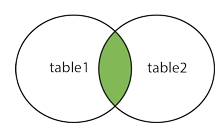

### The INNER JOIN keyword selects records that have matching values in both the tables.
### INNER JOIN Syntax
SELECT column_name(s)

FROM table1

INNER JOIN table2

ON table1.column_name = table2.column_name;


In [161]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "SELECT estonia.PassengerDetails.Firstname, estonia.PassengerDetailsDup.Lastname FROM estonia.PassengerDetailsDup INNER JOIN estonia.PassengerDetails ON estonia.PassengerDetailsDup.PassengerId = estonia.PassengerDetails.PassengerId;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARVID KALLE', 'AADLI')
('LEA', 'SHAAN')
('AIRI', 'LAKSHMI')
('JURI', 'VIVEK')
('BRITTA ELISABET', 'ALI')
('GERD INGA MAGNHILD', 'AMAR')
('HJALMAR', 'AKBAR')
('Jingle', 'ANTHONY')
('TORMI', 'TARUN')
('ANNA MARIA', 'ALDRIN')


### Firstname from PassengerDetails and Lastname from PassengerDetailsDup are joined by PassengerId column

SELECT estonia.PassengerDetails.Firstname, estonia.PassengerDetailsDup.Lastname

FROM estonia.PassengerDetails

INNER JOIN estonia.PassengerDetailsDup ON estonia.PassengerDetailsDup.PassengerId = estonia.PassengerDetails.PassengerId;

### LEFT JOIN

The LEFT JOIN returns all the records from the table1 (left table) and the matched records from the table2 (right table). The output is NULL from the right side if there is no match


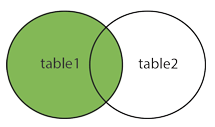

### LEFT JOIN Syntax
SELECT column_name(s)

FROM table1

LEFT JOIN table2

ON table1.column_name = table2.column_name;


In [164]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "SELECT estonia.PassengerDetails.Firstname, estonia.PassengerDetailsDup.Lastname FROM estonia.PassengerDetails LEFT JOIN estonia.PassengerDetailsDup ON estonia.PassengerDetailsDup.PassengerId = estonia.PassengerDetails.PassengerId ;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARVID KALLE', 'AADLI')
('LEA', 'SHAAN')
('AIRI', 'LAKSHMI')
('JURI', 'VIVEK')
('BRITTA ELISABET', 'ALI')
('GERD INGA MAGNHILD', 'AMAR')
('HJALMAR', 'AKBAR')
('Jingle', 'ANTHONY')
('TORMI', 'TARUN')
('ANNA MARIA', 'ALDRIN')
('LARS BERTIL', None)
('NELLI', None)
('URMAS', None)
('TAMARA', None)
('KATRIN', None)
('LINE', None)
('ARMIDO', None)
('BENGT SOLVE INGEMAR', None)
('GUN DAGMAR INGEGERD', None)
('CARL OLOF INGVAR', None)
('HJORDIS IRENE', None)
('PAUL', None)
('AGNE KARL ARVID', None)
('ANNA LENA', None)
('INGRID VIOLA AMALIA', None)
('IRIS VIKTORIA', None)
('JILL MARIA', None)
('KAJ OLAV ARTHUR', None)
('KARL ERIK', None)
('LARS MAGNUS', None)
('MONICA INGEGERD', None)
('PER ALBERT', None)
('RUT INGEGERD', None)
('RUTH INGER', None)
('ULLA GUNVOR LINNEA', None)
('VIVI INGEBORG MARIANN', None)
('AKE HILMER', None)
('NIKOLAJS', None)
('ARVO', None)
('ALLA', None)
('LEMBIT', None)
('EVI', None)
('EVALD VALTER', None)
('KARIN CECILIA', None)
('ANTI', None)
('TIINA', None)
('AL

SELECT estonia.PassengerDetails.Firstname, estonia.PassengerDetailsDup.Lastname

FROM estonia.PassengerDetails

LEFT JOIN estonia.PassengerDetailsDup

ON estonia.PassengerDetailsDup.PassengerId=estonia.PassengerDetails.PassengerId

ORDER BY estonia.PassengerDetails.lastname;

### If the PassengerId matches then the values for Both Firstname from PassengerDetails and Lastname from PassengerDetailsDup are printed but all values from PassengerDetails(left table) are printed, and values for PassengerDetailsDup(right table) are printed none if not matched, only matched values from right table are printed others are printed as none

### RIGHT JOIN

The RIGHT JOIN is the opposite of LEFT JOIN. The RIGHT JOIN prints all the columns from the table2(right table) even if there no matching rows have been found in the table1 (left table). If there no matches have been found in the table (left table), NULL is returned.


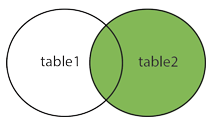

### RIGHT JOIN Syntax
SELECT column_name(s)

FROM table1

RIGHT JOIN table2  ON table1.column_name = table2.column_name;


In [168]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "SELECT estonia.PassengerDetails.Firstname, estonia.PassengerDetailsDup.Lastname FROM estonia.PassengerDetails RIGHT JOIN estonia.PassengerDetailsDup ON estonia.PassengerDetailsDup.PassengerId = estonia.PassengerDetails.PassengerId ;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARVID KALLE', 'AADLI')
('LEA', 'SHAAN')
('AIRI', 'LAKSHMI')
('JURI', 'VIVEK')
('BRITTA ELISABET', 'ALI')
('GERD INGA MAGNHILD', 'AMAR')
('HJALMAR', 'AKBAR')
('Jingle', 'ANTHONY')
('TORMI', 'TARUN')
('ANNA MARIA', 'ALDRIN')


In [ ]:
SELECT estonia.PassengerDetails.Firstname, estonia.PassengerDetailsDup.Lastname

FROM estonia.PassengerDetails

RIGHT JOIN estonia.PassengerDetailsDup

ON estonia.PassengerDetailsDup.PassengerId=estonia.PassengerDetails.PassengerId

ORDER BY estonia.PassengerDetails.lastname;

### Full OUTER JOIN

The FULL OUTER JOIN keyword returns all records when there are a match in left (table1) or right (table2) table records.
#### Note: FULL OUTER JOIN can potentially return very large result-sets!


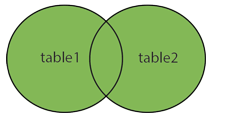

### Tip: FULL OUTER JOIN and FULL JOIN are the same.
### FULL OUTER JOIN Syntax
SELECT column_name(s)

FROM table1

FULL OUTER JOIN table2

ON table1.column_name = table2.column_name WHERE condition;


### Note: MySQL does not support the Full Join, so we can perform left join and right join separately then take the union of them.
SELECT * FROM t1

LEFT JOIN t2 ON t1.id = t2.id

UNION

SELECT * FROM t1

RIGHT JOIN t2 ON t1.id = t2.id


In [171]:
import mysql.connector as connection


try:
    mydb = connection.connect(host="localhost", database = 'estonia',user="root", passwd="mysql",use_pure=True)
    #check if the connection is established
    print(mydb.is_connected())
    query = "SELECT estonia.PassengerDetails.Firstname, estonia.PassengerDetailsDup.Lastname FROM estonia.PassengerDetails LEFT JOIN estonia.PassengerDetailsDup ON estonia.PassengerDetailsDup.PassengerId = estonia.PassengerDetails.PassengerId UNION SELECT estonia.PassengerDetails.Firstname, estonia.PassengerDetailsDup.Lastname FROM estonia.PassengerDetails RIGHT JOIN estonia.PassengerDetailsDup ON estonia.PassengerDetailsDup.PassengerId = estonia.PassengerDetails.PassengerId ;"
    cursor = mydb.cursor() #create a cursor to execute queries
    cursor.execute(query)
    for result in cursor.fetchall():
        print(result)
    mydb.close() #close the connection


except Exception as e:
    #mydb.close()
    print(str(e))

True
('ARVID KALLE', 'AADLI')
('LEA', 'SHAAN')
('AIRI', 'LAKSHMI')
('JURI', 'VIVEK')
('BRITTA ELISABET', 'ALI')
('GERD INGA MAGNHILD', 'AMAR')
('HJALMAR', 'AKBAR')
('Jingle', 'ANTHONY')
('TORMI', 'TARUN')
('ANNA MARIA', 'ALDRIN')
('LARS BERTIL', None)
('NELLI', None)
('URMAS', None)
('TAMARA', None)
('KATRIN', None)
('LINE', None)
('ARMIDO', None)
('BENGT SOLVE INGEMAR', None)
('GUN DAGMAR INGEGERD', None)
('CARL OLOF INGVAR', None)
('HJORDIS IRENE', None)
('PAUL', None)
('AGNE KARL ARVID', None)
('ANNA LENA', None)
('INGRID VIOLA AMALIA', None)
('IRIS VIKTORIA', None)
('JILL MARIA', None)
('KAJ OLAV ARTHUR', None)
('KARL ERIK', None)
('LARS MAGNUS', None)
('MONICA INGEGERD', None)
('PER ALBERT', None)
('RUT INGEGERD', None)
('RUTH INGER', None)
('ULLA GUNVOR LINNEA', None)
('VIVI INGEBORG MARIANN', None)
('AKE HILMER', None)
('NIKOLAJS', None)
('ARVO', None)
('ALLA', None)
('LEMBIT', None)
('EVI', None)
('EVALD VALTER', None)
('KARIN CECILIA', None)
('ANTI', None)
('TIINA', None)
('AL